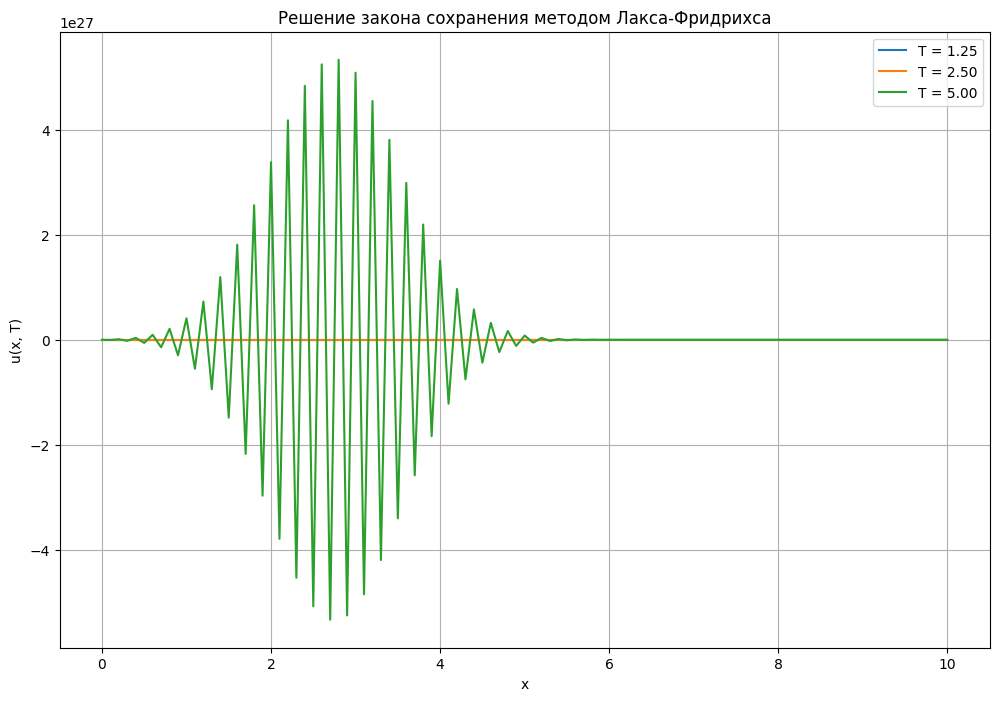

In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 10                  # Длина интервала
T_values = [1.25, 2.5, 5]  # Временные интервалы
Nx = 100                # Число узлов по пространству
Delta_x = L / Nx        # Шаг по пространству
Delta_t = 0.5 * Delta_x  # Шаг по времени (с учетом условия устойчивости)

x = np.linspace(0, L, Nx+1)

u_initial = np.cos(x)**2

def lax_friedrichs(u0, T, Delta_x, Delta_t):
    Nt = int(T / Delta_t)  # Число временных шагов
    u = u0.copy()          # Текущий временной слой
    u_new = np.zeros_like(u)  # Следующий временной слой
    
    for n in range(Nt):
        # Обновляем значения на внутренней области
        for j in range(1, Nx):
            u_new[j] = 0.5 * (u[j-1] + u[j+1]) - (Delta_t / Delta_x) * (u[j] - u[j-1])
        
        # Граничные условия
        u_new[0] = 0  # u(0, t) = 0
        u_new[-1] = u[-1]  # Правый конец без изменений (естественное условие)

        # Переходим к следующему слою
        u[:] = u_new[:]
    
    return u

plt.figure(figsize=(12, 8))

for i, T in enumerate(T_values):
    u = lax_friedrichs(u_initial, T, Delta_x, Delta_t)
    plt.plot(x, u, label=f"T = {T:.2f}")

plt.title("Решение закона сохранения методом Лакса-Фридрихса")
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.legend()
plt.grid()
plt.show()
